Undirected Graphs

Directed Graphs

Path length: the average distance between two nodes

Clustering coefficient (WS): Quantifies the likelihood that two nodes that are connected to the same node are also connected to each other.

Connected Graph: There is a path from every node to every other node.

Complete Graph: Every node is connected to every other node.

Regular Graph: Each node has the same number of neighbours (degree), results in high clustering and high path length.

Random Graph: Nodes and edges are generated at random, e.g. Erd\"os-Rényi (ER) graphs. $n$ number of nodes and $p$ the probability that there is an edge between any two nodes. Results in low clustering and small path length.

In [81]:
import networkx as nx
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt

## Complete Graphs

In [55]:
n_nodes = 10
network = [(u,v) for u in range(n_nodes) for v in range(u+1,n_nodes)]

Store all the direct connections (neighbours) whith each node in a dictionary

In [85]:
nodes = {nid: set() for nid in range(n_nodes)}
for link in network:
    nodes[link[0]].add(link[1])
    nodes[link[1]].add(link[0])
nodes = dict(nodes)

In [58]:
nodes

{0: {1, 2, 3, 4, 5, 6, 7, 8, 9},
 1: {0, 2, 3, 4, 5, 6, 7, 8, 9},
 2: {0, 1, 3, 4, 5, 6, 7, 8, 9},
 3: {0, 1, 2, 4, 5, 6, 7, 8, 9},
 4: {0, 1, 2, 3, 5, 6, 7, 8, 9},
 5: {0, 1, 2, 3, 4, 6, 7, 8, 9},
 6: {0, 1, 2, 3, 4, 5, 7, 8, 9},
 7: {0, 1, 2, 3, 4, 5, 6, 8, 9},
 8: {0, 1, 2, 3, 4, 5, 6, 7, 9},
 9: {0, 1, 2, 3, 4, 5, 6, 7, 8}}

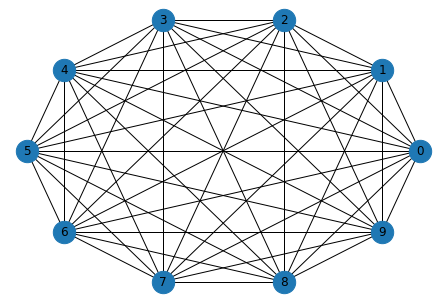

In [63]:
G = nx.Graph()
G.add_nodes_from(nodes.keys())
G.add_edges_from(network)
nx.draw_circular(G, node_size=500, with_labels=True)

Check whether it is connected usind **Depth-First Search**: Start at node $s$. mark $s$ as "seen" and mark its neighbours. Then mark the neighbour's neighbours, etc.

Very inefficient implementation:

In [65]:
def reachable_nodes(nodes, start):
    """
    return all nodes reachable from start
    """
    seen = set()
    stack = [start]  # put starting element into the stack
    while stack:
        node = stack.pop()  # check last element of stack -> depth-first
        if node not in seen:
            seen.add(node)
            stack.extend(nodes[node])  # put the neighbours of the current node into the stack
                                       # this is what makes it so inefficient. Some of these neighbours
                                       # might have been checked already
    return seen

In [66]:
reachable_nodes(nodes, 4)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

If all other nodes are reachable from that starting node then this is true for all nodes and the graph is complete. 

In [70]:
len(reachable_nodes(nodes, 4)) == len(nodes)

True

## Random Graphs - ER Graphs
The ER graph G(n,p) contains $n$ nodes, and each pair of nodes is connected by an edge with probability $p$.

In [86]:
n_nodes = 10
p = 0.3
network = [(u,v) for u in range(n_nodes) for v in range(u+1,n_nodes) if np.random.random() < p]

In [87]:
nodes = {nid: set() for nid in range(n_nodes)}
for link in network:
    nodes[link[0]].add(link[1])
    nodes[link[1]].add(link[0])
nodes = dict(nodes)

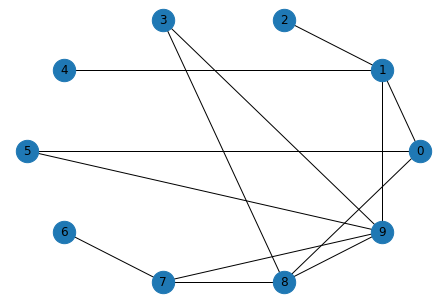

In [88]:
G = nx.Graph()
G.add_nodes_from(nodes.keys())
G.add_edges_from(network)
nx.draw_circular(G, node_size=500, with_labels=True)

In [89]:
np.random.choice(list(nodes.keys()))

6

In [120]:
n_samples = 100
ps = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ys = []
for p in ps:
    results = []
    for _ in range(n_samples):
        network = [(u,v) for u in range(n_nodes) for v in range(u+1,n_nodes) if np.random.random() < p]
        nodes = {nid: set() for nid in range(n_nodes)}
        for link in network:
            nodes[link[0]].add(link[1])
            nodes[link[1]].add(link[0])
        nodes = dict(nodes)
        start = np.random.choice(list(nodes.keys()))
        results.append(len(reachable_nodes(nodes, start)) == len(nodes))
    ys.append(np.mean(results))

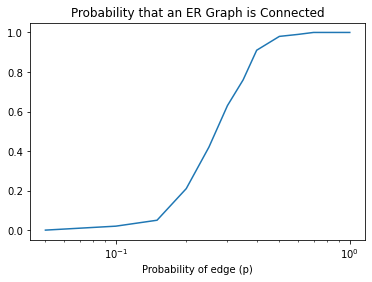

In [124]:
plt.title('Probability that an ER Graph is Connected')
plt.xlabel('Probability of edge (p)')
plt.xscale('log')
plt.plot(ps, ys)

Critical point at $\frac{\ln n}{n}=0.23$

## Models for Social Networks: Watts and Strogatz (WS) Graphs
Regular graphs (clustering and high path length) and random graphs (low clustering and small path lengths) are poor models for social networks, which combine high clustering with short path lengths.

1. Start with a regular graph with $n$ nodes and each node connected to $k$ neighbours.
2. For each edge: with probability $p$ replace the second node by a random node (without itself and avoid more than one edge between a pair of nodes).

Watts and Strogatz use ring lattices as kind of regular graphs as starting points. The $n$ nodes can be arranged in a circle with each node connected to the $k$ nearest neighbours.

In [137]:
k=4

In [140]:
n_nodes = 10
network = [(u,v%n_nodes) for u in range(n_nodes) for v in range(u+1,u+1+k//2) ]

In [141]:
network

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (2, 4),
 (3, 4),
 (3, 5),
 (4, 5),
 (4, 6),
 (5, 6),
 (5, 7),
 (6, 7),
 (6, 8),
 (7, 8),
 (7, 9),
 (8, 9),
 (8, 0),
 (9, 0),
 (9, 1)]

In [142]:
nodes = {nid: set() for nid in range(n_nodes)}
for link in network:
    nodes[link[0]].add(link[1])
    nodes[link[1]].add(link[0])
nodes = dict(nodes)

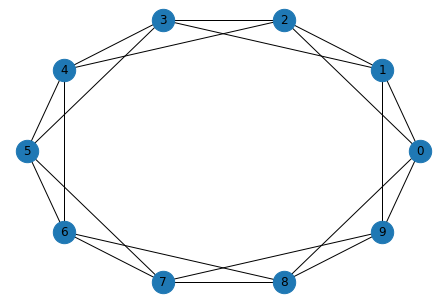

In [143]:
G = nx.Graph()
G.add_nodes_from(nodes.keys())
G.add_edges_from(network)
nx.draw_circular(G, node_size=500, with_labels=True)

## Directed Graph

In [31]:
network = [(0,1), (1,0), (0,2), (2,0), (1,2), (2,1), (1,3), (2,3), (3,4), (5,4), (5,6), (7,5), (6,8), (8,7), (8,9)]

In [24]:
nodes = {nid: {'in':[], 'out':[]} for nid in set([node for link in network for node in link])}
for link in network:
    nodes[link[0]]['out'].append(link[1])
    nodes[link[1]]['in'].append(link[0])

In [27]:
nodes

{0: {'in': [1, 2], 'out': [1, 2]},
 1: {'in': [0, 2], 'out': [0, 2, 3]},
 2: {'in': [0, 1], 'out': [0, 1, 3]},
 3: {'in': [1, 2], 'out': [4]},
 4: {'in': [3, 5], 'out': []},
 5: {'in': [7], 'out': [4, 6]},
 6: {'in': [5], 'out': [8]},
 7: {'in': [8], 'out': [5]},
 8: {'in': [6], 'out': [7, 9]},
 9: {'in': [8], 'out': []}}

## Draw

In [42]:
G = nx.Graph()
G.add_nodes_from(nodes.keys())
G.add_edges_from(network)

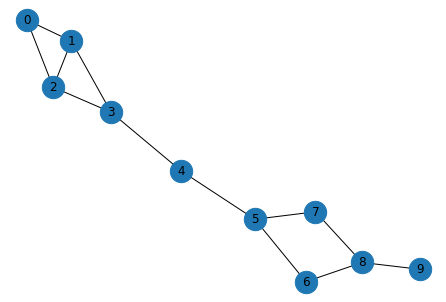

In [52]:
nx.draw(G, node_size=500, with_labels=True)